<a href="https://colab.research.google.com/github/indmind/2141720003-machine-learning-2023/blob/main/week7/tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum Jobsheet 7

Tugas
1. Buatlah sebuah model K-Means dengan ketentuan,
2. Gunakan data 'Mall_Customers.csv'
3. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
4. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
5. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('Mall_Customers.csv')

df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [29]:
df.corr()

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [30]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
from sklearn.calibration import LabelEncoder

le = LabelEncoder() # membuat objek dari LabelEncoder
df['Gender'] = le.fit_transform(df['Gender']) # proses encoding

## Menentukan Fitur

Berdasarkan tabel korelasi, didapatkan Annual Income dan Spending Score memiliki nilai korelasi yang cukup, dibanding dengan nilai lainya.

In [32]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]

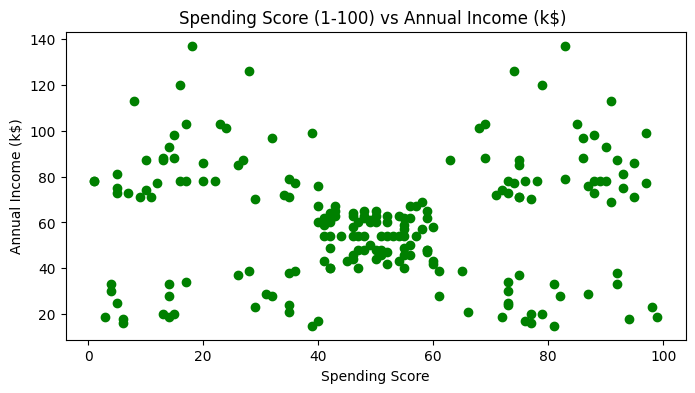

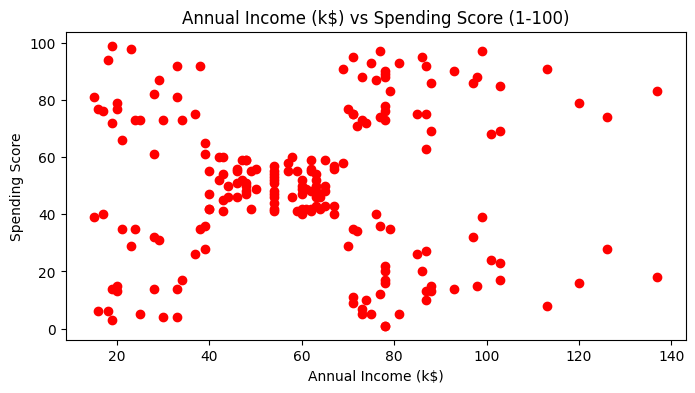

In [75]:
plt.figure(figsize=(8, 4))
plt.scatter(X["Spending Score (1-100)"], X["Annual Income (k$)"], c='g')
plt.title("Spending Score (1-100) vs Annual Income (k$) ")
plt.ylabel("Annual Income (k$)")
plt.xlabel("Spending Score")
plt.show()
plt.figure(figsize=(8, 4))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c='r')
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

Dapat dilihat, secfara kasat mata, tedapat pembentukan cluster pada data tersebut

In [34]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [35]:
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=5)

y_kmeans = cl_kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 44448.4554479337


In [37]:
# List nilai SSE
sse = []
K = range(1,11)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<ipython-input-56-d75537bb2322>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, sse, 'bo-', c='g')


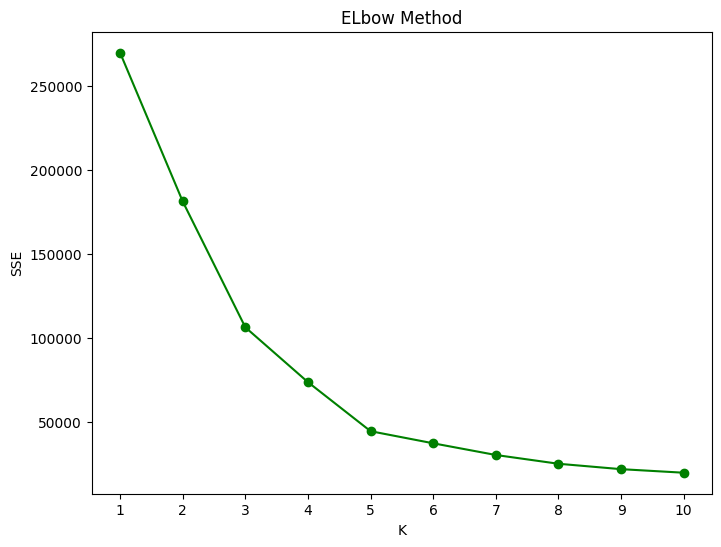

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(K, sse, 'bo-', c='g')
plt.title('ELbow Method')
plt.xlabel('K')
plt.ylabel('SSE')
plt.xticks(K)
plt.show()

In [64]:
# kluster n=5 ditentukan dari  nilai SS yang menunjukan pelambatan penurunan nilai pada grafik sebelumnya
kmeans = KMeans(n_clusters=5)

kmeans.fit(X)

y_kmeans = kmeans.predict(X)
df["label"] = y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


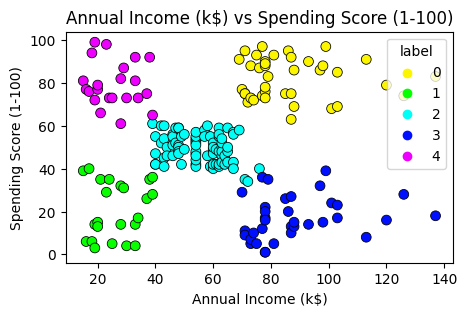

In [62]:
# Scatter plot with consistent color palette
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='label', data=df, palette=sns.color_palette("hsv", n_colors=5), s=50, edgecolor='k')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()

In [42]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=cf6f5520ab2aee347ffe1dcd17ebc1fd2924df94d9c8846fcf5f88553b8fa100
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

## Pendefinisian Helper Functions

In [57]:
def cd(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

def fwuim(input_vector, weights):
    distances = cd(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

def uw(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = fwuim(input_vector, weights)
                uw(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [48]:
# inisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [58]:
bunga = io.imread("bunga.jpg") / 255.0 # norm

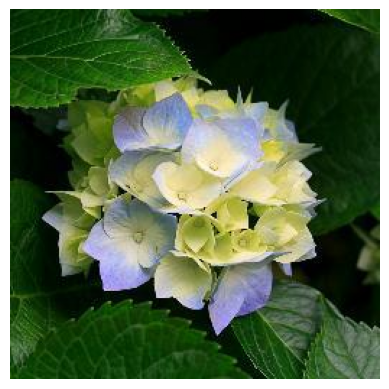

In [50]:
plt.axis('off')
plt.imshow(bunga)

In [52]:
# Latih SOM
num_epochs = 10
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(bunga, num_epochs, initial_learning_rate, initial_neighborhood_radius)

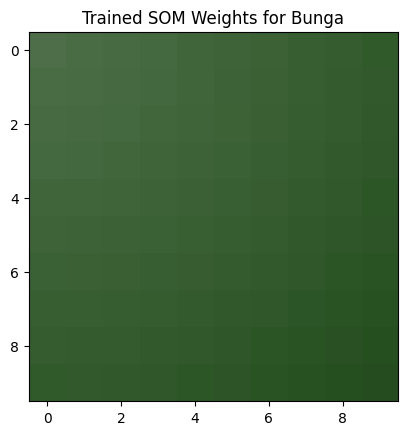

In [53]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Bunga')
plt.show()